In [1]:
!pip3 install scikit-learn

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# ann tensorflow

In [45]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_iris ()

In [4]:
import pandas as pds
import numpy as npy

In [5]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
dfr = pds.DataFrame (data=dataset.data, columns=dataset.feature_names)

In [12]:
dfr['target'] = dataset.target

In [94]:
dfr.iloc[80]

sepal length (cm)    5.5
sepal width (cm)     2.4
petal length (cm)    3.8
petal width (cm)     1.1
target               1.0
Name: 80, dtype: float64

In [23]:
dfr.describe ().T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0

In [18]:
dfr.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [20]:
dfr.dropna (inplace=True)

In [30]:
X = dfr.iloc[:, :-1]
yhat = dfr.iloc[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split (X, yhat, test_size=0.3)

In [73]:
ann = Sequential ([
    Dense (20, activation='relu'),
    Dense (10, activation='relu'),
    Dense (6, activation='relu'),
    Dense (3, activation='softmax')
])

In [74]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [75]:
ann.compile (
    optimizer='adam',
    loss=SparseCategoricalCrossentropy (),
    metrics=['accuracy']
)

In [118]:
history = ann.fit (
    X_train, y_train,
    epochs=100,
    verbose=True,
    validation_data=(X_test, y_test)
)

Epoch 1/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1361 - accuracy: 0.9619 - val_loss: 0.0824 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1330 - accuracy: 0.9619 - val_loss: 0.0707 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1275 - accuracy: 0.9714 - val_loss: 0.0668 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1279 - accuracy: 0.9714 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1269 - accuracy: 0.9714 - val_loss: 0.0662 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1248 - accuracy: 0.9714 - val_loss: 0.0660 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.9619 - val_loss: 0.0682 - val_accuracy: 1.0000
Epoch 8/100
4/4 [=========

4/4 [==============================] - 0s 6ms/step - loss: 0.0953 - accuracy: 0.9810 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0950 - accuracy: 0.9810 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 62/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9714 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 63/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0971 - accuracy: 0.9619 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0944 - accuracy: 0.9619 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0934 - accuracy: 0.9714 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 66/100
4/4 [===============

In [80]:
ann.save (filepath='iris_ann.keras')

In [82]:
model = tf.keras.models.load_model ('iris_ann.keras')

In [100]:
out = model.predict ([[5.5, 2.4, 3.8, 1.1]])

1/1 [==============================] - 0s 21ms/step


In [115]:
length_train = len (X_train)
true_values_train = 0

for i in range (length_train):
    A, B, C, D = X_train.iloc[i]
    true = y_train.iloc[i]
    pred = model.predict ([[A, B, C, D]]).argmax ()
    if true == pred:
        true_values_train += 1

length_test = len (X_test)
true_values_test = 0
        
for i in range (length_test):
    A, B, C, D = X_train.iloc[i]
    true = y_train.iloc[i]
    pred = model.predict ([[A, B, C, D]]).argmax ()
    if true == pred:
        true_values_test += 1

1/1 [==============================] - 0s 18ms/step


In [117]:
(true_values_train / length_train) * 100, (true_values_test / length_test) * 100

(96.19047619047619, 97.77777777777777)

In [125]:
history.history.keys ()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [146]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [131]:
import matplotlib.pyplot as plt

In [144]:
epochs = range(1, len (loss) + 1)

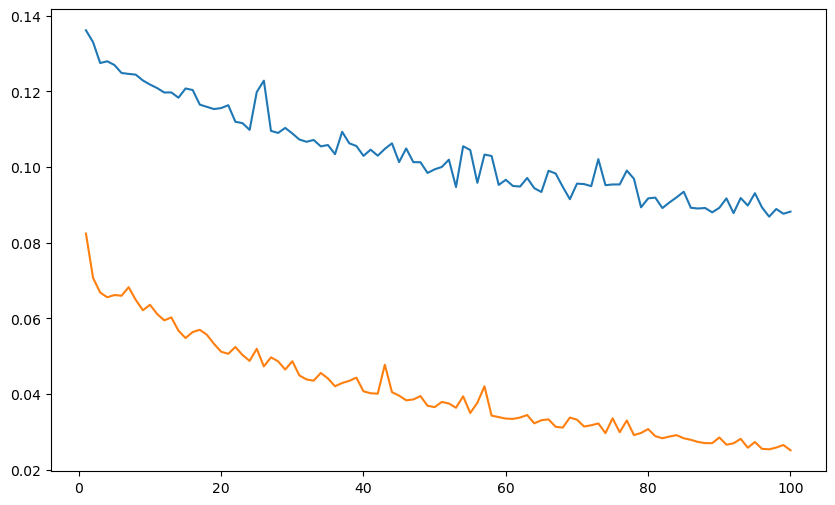

In [145]:
plt.figure (figsize=(10, 6))
plt.plot (epochs, loss)
plt.plot (epochs, val_loss)
plt.show ()

In [ ]:
epochs = range(1, len (accuracy) + 1)

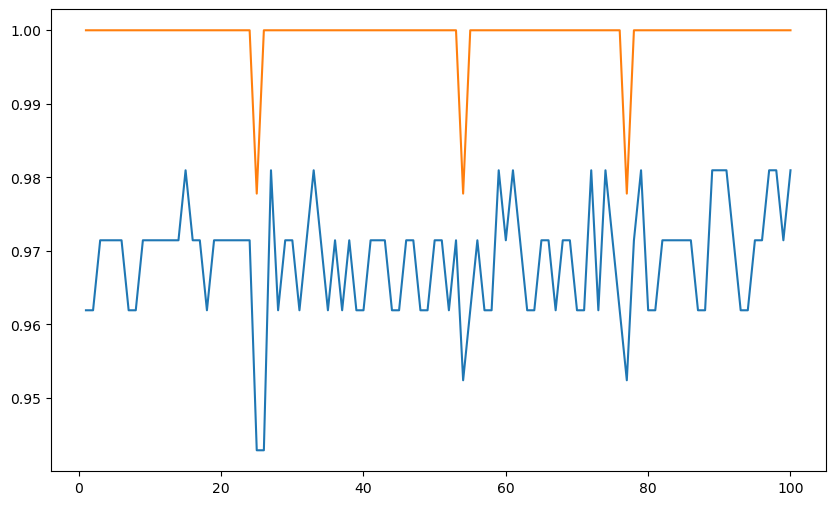

In [147]:
plt.figure (figsize=(10, 6))
plt.plot (epochs, accuracy)
plt.plot (epochs, val_accuracy)
plt.show ()